<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Machine-Learning/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gs = pd.read_csv('gender_submission.csv')

In [3]:
train.shape , test.shape

((891, 12), (418, 11))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.drop('Cabin' , axis=1 , inplace=True)

In [6]:
train['Age'].fillna(train['Age'].mean() , inplace=True)

/tmp/ipython-input-703437102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean() , inplace=True)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
train.drop('PassengerId' , axis=1 , inplace=True)

In [9]:
train['Embarked'].fillna(train['Embarked'].mode()[0] , inplace=True)

/tmp/ipython-input-1816662509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0] , inplace=True)


In [10]:
train.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [11]:
train.duplicated().sum()

np.int64(0)

In [12]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

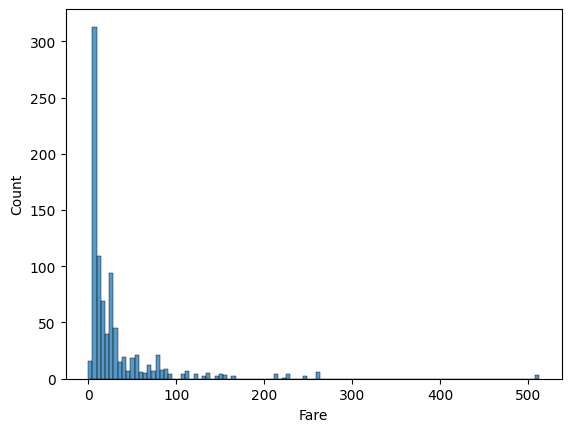

In [13]:
sns.histplot(data=train , x = 'Fare')

<Axes: xlabel='Parch', ylabel='Count'>

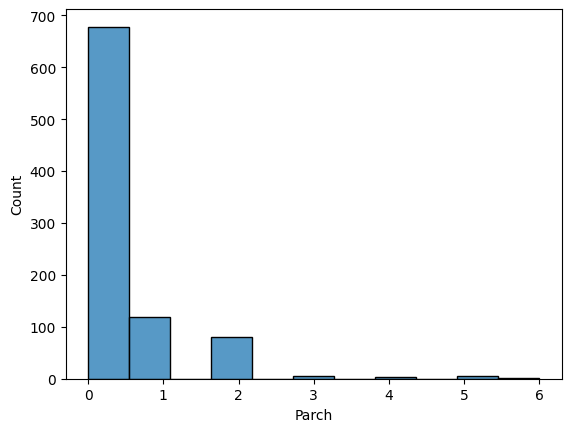

In [14]:
sns.histplot(data=train , x = 'Parch')

<Axes: xlabel='Parch', ylabel='Count'>

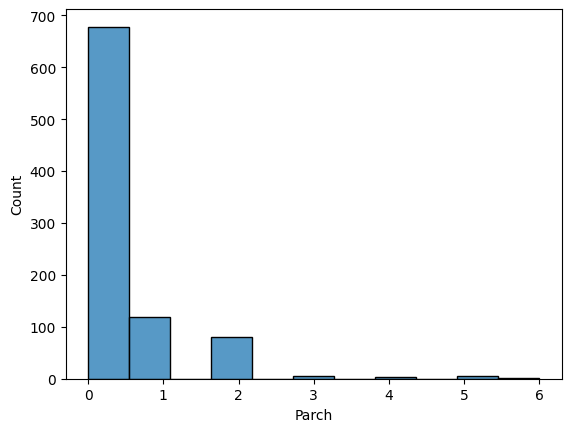

In [15]:
sns.histplot(data=train , x = 'Parch')

<Axes: xlabel='Age', ylabel='Count'>

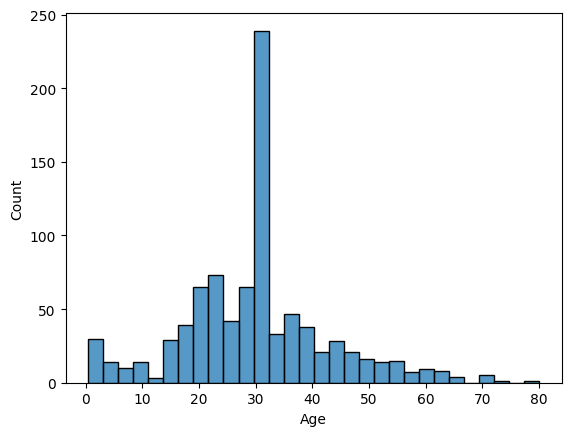

In [16]:
sns.histplot(data=train , x = 'Age')

In [17]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
iqr = Q3 - Q1
lower = Q1 - 1.5 * iqr
upper = Q3 + 1.5 * iqr

train['Fare'] = train['Fare'].clip(lower, upper)

In [18]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [19]:
cat = [i for i in train.columns if train[i].dtype == 'O']
num = [i for i in train.columns if train[i].dtype != 'O']

In [20]:
cat

['Name', 'Sex', 'Ticket', 'Embarked']

In [21]:
scaler = MinMaxScaler()
train[num] = scaler.fit_transform(train[num])

In [22]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.110460,S
1,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,1.000000,C
2,1.0,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.120745,S
3,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.809027,S
4,0.0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.122649,S


In [23]:
for i in cat:
  print(train[i].value_counts() , '\n======================================================\n')

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 

Sex
male      577
female    314
Name: count, dtype: int64 

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Lengt

In [24]:
train.drop('Ticket' , axis=1 , inplace=True)
train.drop('Name' , axis=1 , inplace=True)

In [25]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,male,0.271174,0.125,0.0,0.110460,S
1,1.0,0.0,female,0.472229,0.125,0.0,1.000000,C
2,1.0,1.0,female,0.321438,0.000,0.0,0.120745,S
3,1.0,0.0,female,0.434531,0.125,0.0,0.809027,S
4,0.0,1.0,male,0.434531,0.000,0.0,0.122649,S


In [26]:
!pip install category_encoders

In [27]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['Sex' , 'Embarked'])
train = encoder.fit_transform(train)

In [28]:
train.head()

,Survived,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,0.0,1.0,1,0,0.271174,0.125,0.0,0.110460,1,0,0
1,1.0,0.0,0,1,0.472229,0.125,0.0,1.000000,0,1,0
2,1.0,1.0,0,1,0.321438,0.000,0.0,0.120745,1,0,0
3,1.0,0.0,0,1,0.434531,0.125,0.0,0.809027,1,0,0
4,0.0,1.0,1,0,0.434531,0.000,0.0,0.122649,1,0,0


In [29]:
train.shape

(891, 11)

In [30]:
x = train.drop('Survived' , axis=1)
y = train['Survived']

In [31]:
xtrain , xtest , ytrain , ytest =train_test_split(x , y , random_state=40 , test_size=0.2)

In [32]:
xtrain.shape , xtest.shape

((712, 10), (179, 10))

In [33]:
from sklearn.linear_model import LogisticRegression

lo = LogisticRegression(max_iter=1000)
lo.fit(xtrain, ytrain)
ypred = lo.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       103
         1.0       0.79      0.78      0.78        76

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 1.0, 'Accuracy vs K')

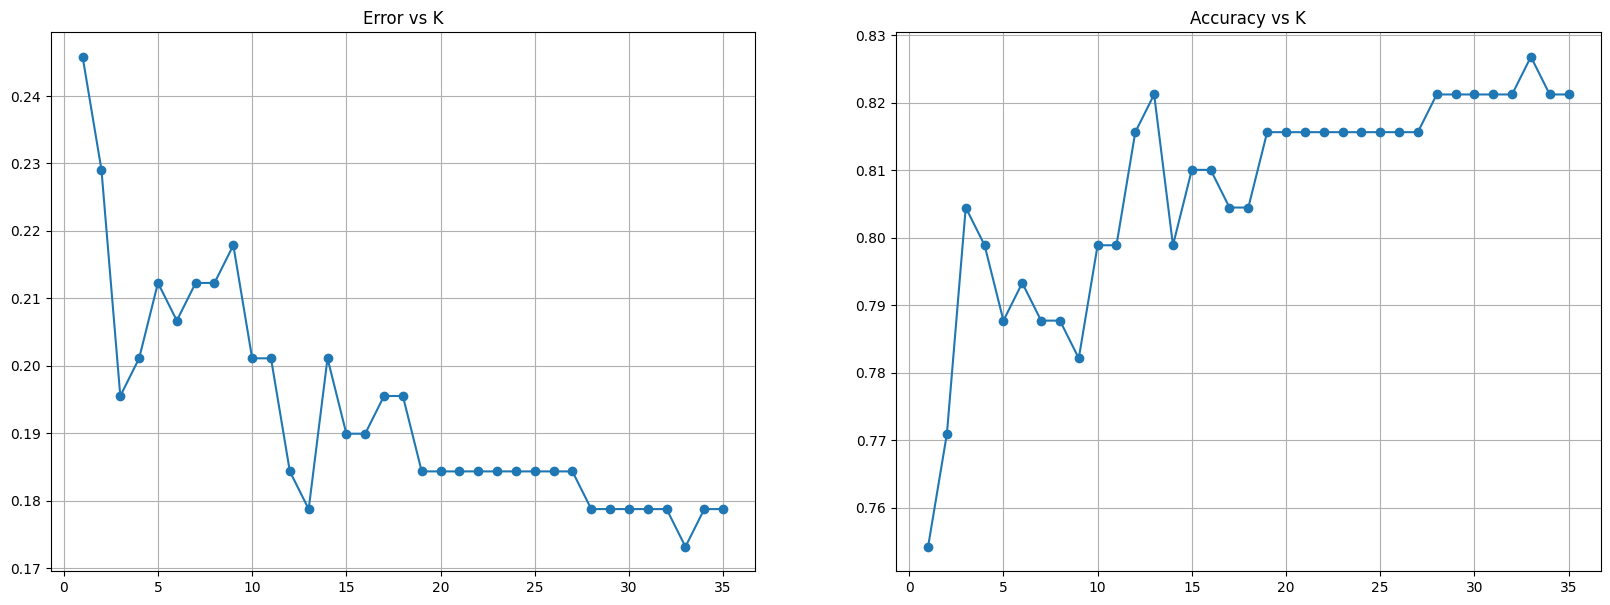

In [34]:
k = 35
error = []
accuracy = []

for i in range(1, k+1):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain , ytrain)
  ypred = knn.predict(xtest)
  error.append(1-accuracy_score(ytest , ypred))
  accuracy.append(accuracy_score(ytest , ypred))


plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,36) , error , marker='o')
plt.grid()
plt.title('Error vs K')

plt.subplot(1,2,2)
plt.plot(range(1,36) , accuracy , marker='o')
plt.grid()
plt.title('Accuracy vs K')

In [35]:
knn = KNeighborsClassifier(33)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86       103
         1.0       0.92      0.64      0.76        76

    accuracy                           0.83       179
   macro avg       0.86      0.80      0.81       179
weighted avg       0.84      0.83      0.82       179



In [36]:
dt = DecisionTreeClassifier(criterion='gini' , max_depth=10)
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86       103
         1.0       0.84      0.76      0.80        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [37]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

params = {
    'max_depth': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
}

rnc = GridSearchCV(
    dt,
    params,
    n_jobs=-1,
    scoring='f1',
    cv=10
)

rnc.fit(xtrain , ytrain)

print("best_estimator : " , rnc.best_estimator_)
model = rnc.best_estimator_
ypred = model.predict(xtest)
print(classification_report(ytest , ypred))

best_estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=5)
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       103
         1.0       0.86      0.72      0.79        76

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.83      0.83       179



In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=None ,
    n_estimators= 100,
    random_state=42,
)

rf.fit(xtrain , ytrain)
ypred = rf.predict(xtest)
print(classification_report(ytest , ypred))

              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84       103
         1.0       0.81      0.71      0.76        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [39]:
from sklearn.model_selection import RandomizedSearchCV


rf = RandomForestClassifier()
params = {
    'max_depth' :(range(5,21)),
    'n_estimators' : [100,200,300,400],
    'criterion' : ['gini' , 'entropy'],
    'min_samples_leaf' : range(2,21),
    'min_samples_split' : range(2,21),
    'bootstrap' : [False , True]
}

rnc = RandomizedSearchCV(
    rf,
    param_distributions=params,
    n_jobs=-1,
    n_iter=40,
    scoring='f1'
)

rnc.fit(xtrain , ytrain)

print("best_estimator : " , rnc.best_estimator_)
model = rnc.best_estimator_
ypred = model.predict(xtest)
print(classification_report(ytest , ypred))

best_estimator :  RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_leaf=3,
                       min_samples_split=11, n_estimators=300)
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       103
         1.0       0.88      0.75      0.81        76

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [41]:
# rf = RandomForestClassifier()

# params = {
#     'max_depth': [5, 10, 15, 20],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_leaf': [2, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'n_estimators' : [100,200,300,400],
#     'bootstrap' : [False , True]
# }

# rnc = GridSearchCV(
#     rf,
#     params,
#     n_jobs=-1,
#     scoring='f1',
#     cv=10
# )

# rnc.fit(xtrain , ytrain)

# print("best_estimator : " , rnc.best_estimator_)
# model = rnc.best_estimator_
# ypred = model.predict(xtest)
# print(classification_report(ytest , ypred))

In [64]:
test = pd.read_csv("test.csv")

In [65]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
test.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [67]:
test.drop('Cabin' , axis=1 , inplace=True)
test['Age'].fillna(test['Age'].mean() , inplace=True)

/tmp/ipython-input-2247234972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean() , inplace=True)


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [69]:
test['Fare'].dropna(inplace=True)

In [70]:
test.isna().sum().sum()

np.int64(1)

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [72]:
test.dropna(inplace=True)

In [73]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [74]:
test.drop('Ticket' , axis=1 , inplace=True)
test.drop('Name' , axis=1 , inplace=True)
test.drop('PassengerId' , axis=1 , inplace=True)

In [75]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [76]:
encoder = ce.OneHotEncoder(cols=['Sex' , 'Embarked'])
test = encoder.fit_transform(test)

In [77]:
test.head()

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,34.5,0,0,7.8292,1,0,0
1,3,0,1,47.0,1,0,7.0000,0,1,0
2,2,1,0,62.0,0,0,9.6875,1,0,0
3,3,1,0,27.0,0,0,8.6625,0,1,0
4,3,0,1,22.0,1,1,12.2875,0,1,0


In [78]:
scaler = MinMaxScaler()
test_columns = test.columns
test = scaler.fit_transform(test)

In [79]:
test = pd.DataFrame(test, columns=test_columns)
test.head()

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,1.0,1.0,0.0,0.452723,0.000,0.000000,0.015282,1.0,0.0,0.0
1,1.0,0.0,1.0,0.617566,0.125,0.000000,0.013663,0.0,1.0,0.0
2,0.5,1.0,0.0,0.815377,0.000,0.000000,0.018909,1.0,0.0,0.0
3,1.0,1.0,0.0,0.353818,0.000,0.000000,0.016908,0.0,1.0,0.0
4,1.0,0.0,1.0,0.287881,0.125,0.111111,0.023984,0.0,1.0,0.0


In [80]:
X_test = test

In [82]:
model = RandomForestClassifier(criterion='entropy', max_depth=18, min_samples_leaf=3, min_samples_split=11, n_estimators=300)
model.fit(xtrain , ytrain)
predictions = model.predict(X_test)
output = pd.DataFrame({"Survived" : predictions})